# MODELADO DE DATOS

In [19]:
#Comenzamos importando las librerías necesarias
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn import neighbors
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [20]:
#Cargamos el conjunto de datos
filename = "../data/base_preprocesamiento.csv"
data = pd.read_csv(filename)

In [21]:
#Comprobamos que se ha cargado correctamente
data.head(10)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,9,0,1500.0,0,INTERNET,16.224843,linux,1,1,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,2,0,1500.0,0,INTERNET,3.363854,other,1,1,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,30,0,200.0,0,INTERNET,22.730559,windows,0,1,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,1,0,200.0,0,INTERNET,15.215816,linux,1,1,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,26,0,200.0,0,INTERNET,3.743048,other,0,1,0
5,0,0.6,0.294840,-1,369,30,0.024232,-1.232556,AD,1204,...,30,0,200.0,0,INTERNET,6.987316,linux,1,1,0
6,0,0.2,0.773085,22,4,40,0.006919,-0.544676,AB,1998,...,1,0,200.0,0,INTERNET,28.199923,x11,1,1,0
7,0,0.8,0.153880,-1,103,40,0.045122,-1.101184,AB,1548,...,25,1,200.0,0,INTERNET,11.234264,other,1,1,0
8,0,0.3,0.523655,21,2,30,0.035206,-0.955737,AB,1781,...,2,0,200.0,0,INTERNET,5.329387,other,1,1,0
9,0,0.8,0.834475,-1,134,20,0.017245,-1.356393,AD,3113,...,15,0,1500.0,0,INTERNET,4.103970,other,1,1,0


In [22]:
#Cargamos los otros conjuntos de datos
filename1 = "../data/X_train.csv"
filename2 = "../data/X_test.csv"
filename3 = "../data/y_train.csv"
filename4 = "../data/y_test.csv"


X_train = pd.read_csv(filename1)
X_test = pd.read_csv(filename2)
y_train = pd.read_csv(filename3)
y_test = pd.read_csv(filename4)


In [23]:
#Comprobamos que se han cargado correctamente
X_train.head(10)

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,velocity_24h,date_of_birth_distinct_emails_4w,credit_risk_score,...,housing_status_BC,housing_status_BD,housing_status_BE,housing_status_BF,housing_status_BG,source_TELEAPP,device_os_linux,device_os_macintosh,device_os_other,device_os_windows
0,0.6,0.430393,-1,29,50,0.007139,-0.770661,5208.169800,2,50,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.8,0.526791,10,6,40,0.024797,-1.353757,7830.345921,21,131,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.9,0.261854,25,31,20,70.728204,-1.404875,5436.987186,7,87,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.3,0.234989,-1,112,40,0.001179,-0.730689,3245.309667,4,103,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.7,0.388970,34,12,30,0.031244,16.776693,4604.766939,6,72,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.1,0.417593,-1,38,40,0.015301,-1.368188,6114.691297,14,221,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0.9,0.993716,22,8,30,0.023317,48.601249,4913.913953,24,173,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.1,0.878703,11,4,20,0.008045,-1.256807,5568.994706,19,102,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.7,0.221928,-1,23,50,0.029497,-0.646195,5185.149192,5,28,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.2,0.258522,-1,133,40,0.010357,-1.444077,2406.880905,3,38,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


### ELECCIÓN DEL MODELO

En esta celda vamos a añadir a una lista varios modelos de clasificaciónpara predecir los clientes fraudulentos del conjunto de datos. Los modelos que voy a incluir son Regresión Logística, Análisis Discriminante Lineal, Árbol de Decisión,Naive Bayes Gaussiano y el Random Forest.
Me hubiese gustao también comparar con los modelos K Nearest Neighbour y el Super Vector Machine, pero como el conjunto de datos es muy grande, tarda demasiado en entrenarlo.
A partir de esto analizaremos sus métricas de rendimiento, como la precisión , el recall y el F1-Score, para determinar cuál considero que es el más adecaudo para este problema específico.

In [24]:
models=[]
models.append(('LoR', LogisticRegression(solver='lbfgs')))
models.append(('LDA', LinearDiscriminantAnalysis()))
#models.append(('K-NN', KNeighborsClassifier(n_neighbors=10)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
#models.append(('SVC', SVC(gamma='auto', C=2.0, kernel='linear')))


In [ ]:
Procedemos a crear una función para hacer la matriz de confusión de cada uno de los modelos.

In [25]:
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
def evaluate_model(y_test, pred_y):
    plt.figure(figsize=(8, 8))
    conf_matrix = ConfusionMatrixDisplay.from_predictions(y_test, pred_y,normalize='true', values_format='.2f')
    #plt.figure(figsize=(8, 8))
    #sns.heatmap(conf_matrix, annot=True);
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))

Entrenamos los modelos y aplicamos la función anterior para cada uno de ellos:

confusion matrix of: {LogisticRegression()}


<Figure size 800x800 with 0 Axes>

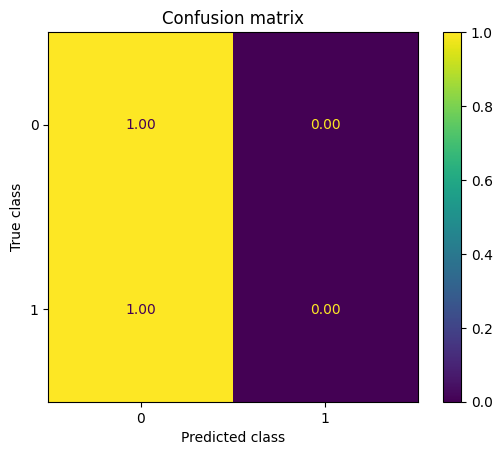

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    197805
           1       0.00      0.00      0.00      2195

    accuracy                           0.99    200000
   macro avg       0.49      0.50      0.50    200000
weighted avg       0.98      0.99      0.98    200000

confusion matrix of: {LinearDiscriminantAnalysis()}


<Figure size 800x800 with 0 Axes>

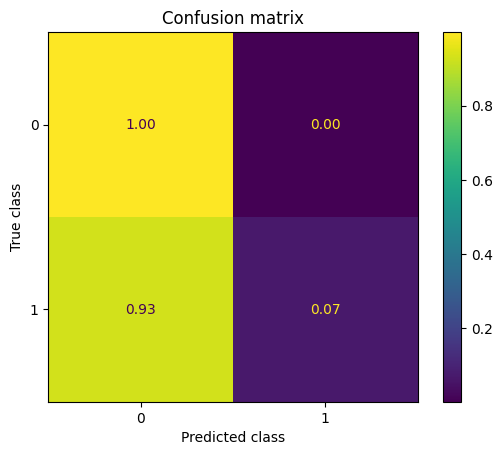

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    197805
           1       0.34      0.07      0.12      2195

    accuracy                           0.99    200000
   macro avg       0.67      0.53      0.56    200000
weighted avg       0.98      0.99      0.98    200000

confusion matrix of: {DecisionTreeClassifier()}


<Figure size 800x800 with 0 Axes>

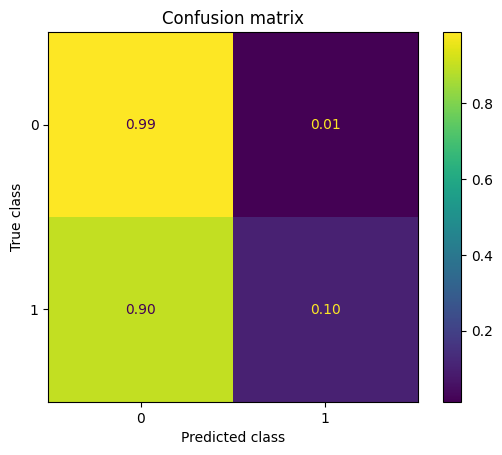

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    197805
           1       0.08      0.10      0.09      2195

    accuracy                           0.98    200000
   macro avg       0.54      0.55      0.54    200000
weighted avg       0.98      0.98      0.98    200000

confusion matrix of: {GaussianNB()}


<Figure size 800x800 with 0 Axes>

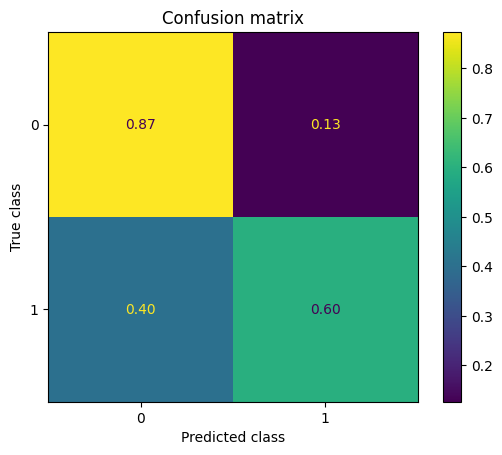

              precision    recall  f1-score   support

           0       0.99      0.87      0.93    197805
           1       0.05      0.60      0.09      2195

    accuracy                           0.87    200000
   macro avg       0.52      0.74      0.51    200000
weighted avg       0.98      0.87      0.92    200000

confusion matrix of: {RandomForestClassifier()}


<Figure size 800x800 with 0 Axes>

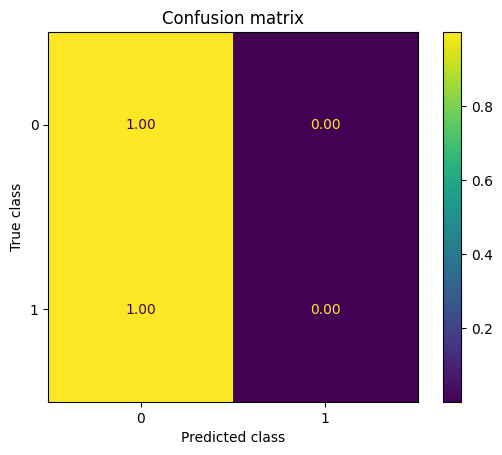

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    197805
           1       0.80      0.00      0.01      2195

    accuracy                           0.99    200000
   macro avg       0.89      0.50      0.50    200000
weighted avg       0.99      0.99      0.98    200000



In [28]:
for name,model in models:
    model.fit(X_train,y_train)
    pred_y = model.predict(X_test)
    print("confusion matrix of:",{model})
    evaluate_model(y_test, pred_y)

Después de ver las comparaciones de cada uno de los modelos elegidos, podemos sacar las siguientes conclusiones

Regresión Logística:

La regresión logística es un modelo que se utiliza para predecir una variable categórica binaria (como fraude o no fraude).
En tu caso, la regresión logística tiene un recall de 0 para los fraudes, lo que significa que no logra identificar ningún fraude correctamente.
Además, el F1-score también es 0, lo que indica un rendimiento muy pobre en general.
Dado que no logra detectar fraudes, no es una buena elección para este problema.

Análisis Discriminante Lineal (LDA):

LDA es un método que busca maximizar la separación entre las clases.
Tiene un recall de 0.07 para los fraudes y un F1-score de 0.12.
Aunque es mejor que la regresión logística, aún no es lo suficientemente bueno para detectar fraudes de manera efectiva.

Árbol de Decisión (Decision Tree Classifier):

Los árboles de decisión son modelos no lineales que dividen el espacio de características en regiones.
El recall de 0.1 para los fraudes y el F1-score de 0.09 son mejores que los modelos anteriores.
Sin embargo, todavía no es lo suficientemente alto para considerarlo como la mejor opción.

Naive Bayes Gaussiano:

El Naive Bayes es un modelo probabilístico que asume independencia entre las características.
Tiene un recall de 0.6 para los fraudes y un F1-score de 0.09.
Aunque el recall es el más alto hasta ahora, la baja precisión (0.05) indica que también clasifica muchos casos no fraudulentos como fraudes.

Después de evaluar varios modelos de clasificación, he decidido utilizar el Árbol de Decisión para predecir fraudes en nuestro conjunto de datos. Aunque su recall no es el más alto, su precisión es significativamente mejor que la de los otros modelos. Dado que queremos minimizar los falsos positivos (clasificar transacciones legítimas como fraudulentas), la precisión es un factor crucial en nuestra elección. El Árbol de Decisión nos proporciona un equilibrio adecuado entre precisión y recall, lo que lo convierte en la mejor opción para nuestro caso específico.

In [29]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

<Figure size 800x800 with 0 Axes>

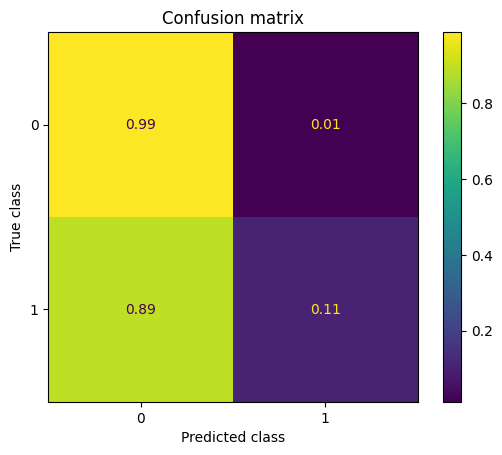

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    197805
           1       0.08      0.11      0.09      2195

    accuracy                           0.98    200000
   macro avg       0.54      0.55      0.54    200000
weighted avg       0.98      0.98      0.98    200000



In [30]:
pred_y = model.predict(X_test)
mostrar_resultados(y_test,pred_y)

Procedo a guardar el modelo entrenado para poder utilizarlo más adelante.

In [32]:
# importo librería para guardar modelos
import pickle

In [80]:
# guardo modelo entrenado en formato pickle
with open('../models/DecissionTreeClassifier.pkl', 'wb') as f:
    pickle.dump(model, f) # dump es la función para guardar el objeto model (LDA entrenado)

In [33]:
# ahora importo el modelo guardado y lo guardo en el nuevo objeto random_forest
CART = pickle.load(open('../models/DecissionTreeClassifier.pkl','rb'))

In [34]:
# verifico que el objeto se cargó correctamente
CART

DecisionTreeClassifier()

In [35]:
# verifico que funciona ok el predict
y_pred_CART = CART.predict(X_test)
y_pred_CART

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Por último, como vimos que el conjunto de datos estaba desbalanceado, haremos uso de la librería SMOTE para hacer over sampling y mejorar el recalll y el f1-Score

In [36]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=123,sampling_strategy=0.25)
X_sm,y_sm = sm.fit_resample(X_train,y_train)
                           
print(f"X antes de SMOTE:",{X_train.shape})
print(f"X despues de SMOTE:",{X_sm.shape})

X antes de SMOTE: {(800000, 45)}
X despues de SMOTE: {(988957, 45)}


In [37]:
print("Balance positivo y negativo de las clases:")
y_sm.value_counts(normalize=True)*100

Balance positivo y negativo de las clases:


fraud_bool
0             80.00004
1             19.99996
Name: proportion, dtype: float64

In [39]:
#VAmos a verlo gráficamente
sns.countplot(x=y_sm,color="salmon")
plt.title("Datos balanceados")

ValueError: If using all scalar values, you must pass an index

Volvemos a dividir el conjunto de daos pero esta vez solo quiero utilizar los datos de entrenamiento despues del oversampling.

In [40]:
X_train_sm,X_test_sm,y_train_sm,y_test_sm=train_test_split(X_sm,y_sm,test_size=0.2,random_state=123,shuffle=True)

In [41]:
CART.fit(X_train_sm,y_train_sm)
predicts = CART.predict(X_test)

In [42]:
accuracy = accuracy_score(y_test, predicts)
recall = recall_score(y_test, predicts)
print(f'Accuracy = {accuracy:,.2f}\nRecall = {recall:,.2f}\n')

Accuracy = 0.97
Recall = 0.11



<Figure size 800x800 with 0 Axes>

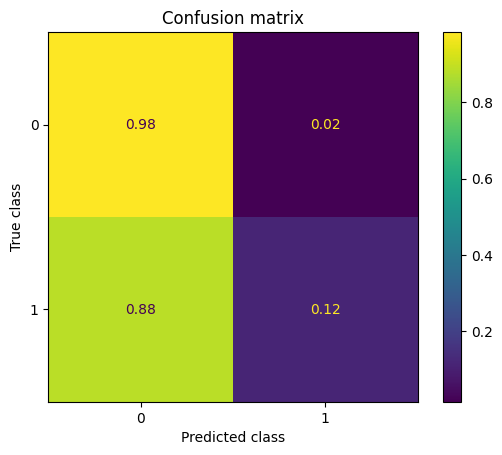

              precision    recall  f1-score   support

           0       0.99      0.98      0.99    197805
           1       0.08      0.12      0.09      2195

    accuracy                           0.97    200000
   macro avg       0.53      0.55      0.54    200000
weighted avg       0.98      0.97      0.98    200000



In [107]:
mostrar_resultados(y_test, predicts)

Vemos que despues de balancear un poco el conjunto de entrenamiento ha mejorado un poco el recall pero las demás métricas no han mejorado nada.

Ahora vamos a buscar los mejores parámetros para sacar las mejores mejores métricas para el modelo.

In [191]:
### Parameter Tunning Optimization
param_grid={
    'criterion':['gini', 'entropy', 'log_loss'],
    'splitter':['best', 'random'],
    'max_depth':[8,9,10,11,12],
    'max_features':['sqrt', 'log2']
}
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

CV = RandomizedSearchCV(CART, param_grid, cv=10, random_state=12345, n_jobs=2)
                  
CV.fit(X_train_sm, y_train_sm)  
print(CV.best_params_)    
print(CV.best_score_)

{'splitter': 'best', 'max_features': 'log2', 'max_depth': 10, 'criterion': 'entropy'}
0.9411576572841925


In [192]:
#Mostramos los mejores parámetros encontrados por pantalla
print(f"Mejores parámetros: {CV.best_params_}")

Mejores parámetros: {'splitter': 'best', 'max_features': 'log2', 'max_depth': 10, 'criterion': 'entropy'}


In [193]:
predictions = CV.predict(X_test)

In [194]:
from sklearn.metrics import accuracy_score,recall_score

accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions)
print(f'Accuracy = {accuracy:,.2f}\nRecall = {recall:,.2f}\n')

Accuracy = 0.98
Recall = 0.14



<Figure size 800x800 with 0 Axes>

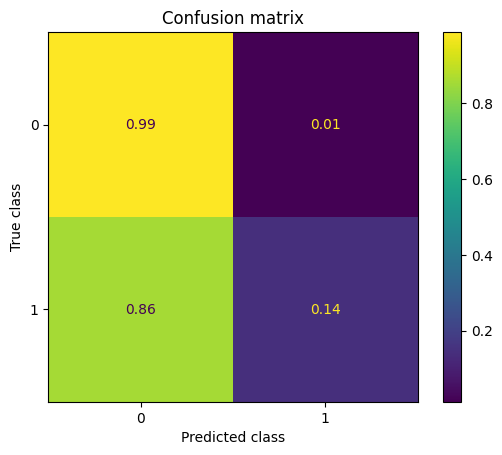

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    197805
           1       0.11      0.14      0.13      2195

    accuracy                           0.98    200000
   macro avg       0.55      0.57      0.56    200000
weighted avg       0.98      0.98      0.98    200000



In [195]:
mostrar_resultados(y_test, predictions)

Tras una búsqueda exhaustiva de los mejores parámetros para nuestro modelo de Árbol de Decisión, hemos logrado mejorar ligeramente su rendimiento. Ahora, el modelo tiene una precisión de 0.11, un recall de 0.14 y un F1-score de 0.13. Aunque no hemos alcanzado un cambio drástico, cada pequeña mejora cuenta en la detección de fraudes. Sería buena idea continuar ajustando nuestro modelo para seguir optimizando su desempeño. Por último, la elección de este modelo se basa en un equilibrio entre precisión y recall.

In [49]:
Best_CART = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, max_features = 'log2', splitter = 'best', max_leaf_nodes = None)
Best_CART.fit(X_train_sm,y_train_sm)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='log2')

In [50]:
predictions = best_CART.predict(X_test)

In [202]:
from sklearn.metrics import accuracy_score,recall_score

accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions)
print(f'Accuracy = {accuracy:,.2f}\nRecall = {recall:,.2f}\n')

Accuracy = 0.98
Recall = 0.14



<Figure size 800x800 with 0 Axes>

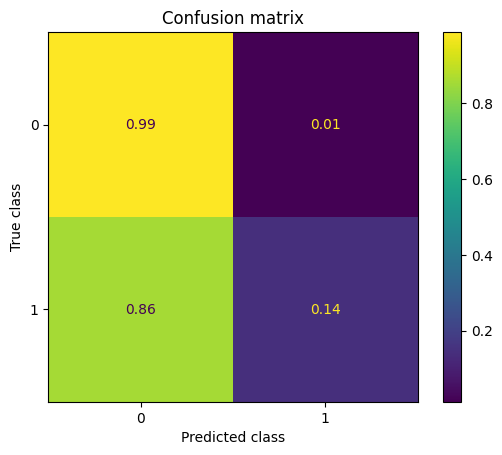

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    197805
           1       0.11      0.14      0.13      2195

    accuracy                           0.98    200000
   macro avg       0.55      0.57      0.56    200000
weighted avg       0.98      0.98      0.98    200000



In [203]:
mostrar_resultados(y_test,predictions)

### IMPORTAMOS EL MODELO PARA EL FUTURO

In [53]:
import pickle

In [54]:
# guardo modelo entrenado en formato pickle
with open('../models/best_CART.pkl', 'wb') as f:
    pickle.dump(Best_CART, f) # dump es la función para guardar el objeto model (LDA entrenado)

In [55]:
# ahora importo el modelo guardado y lo guardo en el nuevo objeto random_forest
best_CART = pickle.load(open('../models/best_CART.pkl','rb'))

In [56]:
# verifico que el objeto se cargó correctamente
best_CART

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='log2')

Vamos a utilizar la Curva Característica Operativa del Receptor (ROC) para evaluar la eficacia de nuestro modelo. Esta curva nos ayudará a entender la relación entre la tasa de verdaderos positivos y falsos positivos en diferentes umbrales, lo que es crucial para determinar el rendimiento general del modelo.

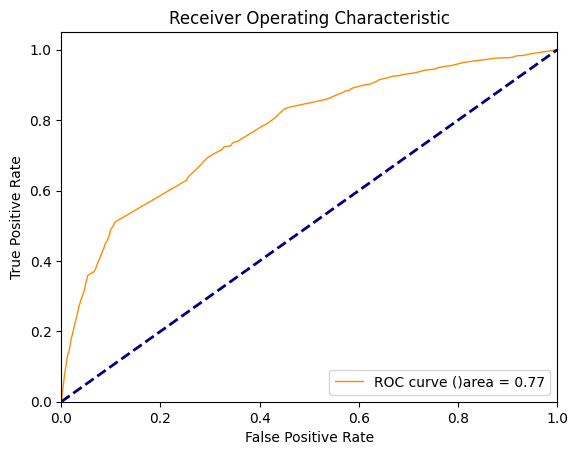

In [46]:
#PROCEDEMOS A HACER EL AREA BAJO LA CURVA
from sklearn.metrics import roc_curve, auc
#Predecir las probabilidades para los conjuntos de prueba
y_pred_prob = best_CART.predict_proba(X_test)[:,1]

#Calcular la curva ROC
fpr, tpr, tresholds = roc_curve(y_test, y_pred_prob)

#Calcular el AUC
roc_auc = auc(fpr, tpr)

#Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
        lw=1, label='ROC curve ()area = %0.2f'
        % roc_auc)
plt.plot([0,1],[0,1], color='navy',
         lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

Como se puede observar en la gráfica ROC de arriba, el área bajo la curva (AUC) es 0.77, lo que indica un buen nivel de precisión del modelo. Sin embargo, hay margen para mejorar y optimizar el modelo para aumentar aún más esta métrica y garantizar una mayor fiabilidad en las predicciones.

Por último utlizamos la Curva de Ganancia para evaluar el rendimiento de mi modelo de clasificación. Esta curva me ayudará a comprender cómo se compara nuestro modelo con una estrategia de referencia (línea de base) y cómo varía el beneficio acumulado a medida que aumentamos el porcentaje de muestras seleccionadas. Es especialmente útil en problemas de clasificación desequilibrados.

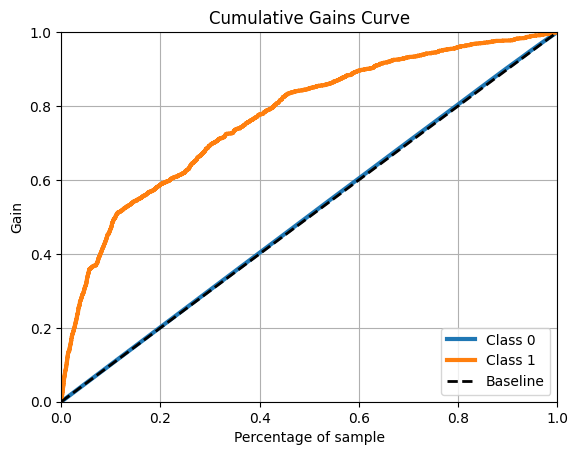

In [47]:
# The magic happens here
import matplotlib.pyplot as plt
import scikitplot as skplt
predict_proba = best_CART.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(y_test, predict_proba)
plt.show()

En la gráfica de la Curva de Ganancia anterior podemos observar las curvas para las clases 0 y 1, así como la línea de referencia (Baseline). La curva de la clase 1 muestra un aumento significativo en el beneficio acumulado en comparación con la línea de referencia, lo que indica que nuestro modelo está proporcionando un valor adicional al seleccionar un porcentaje específico de muestras. Sin embargo, aún podemos explorar estrategias adicionales para mejorar aún más el beneficio acumulado y optimizar nuestro modelo.

### GUARDAMOS LOS DATOS DE ENTRENAMIENTO DESPUES DEL OVER SAMPLING

In [48]:
X_train_sm.to_csv('../data/X_train_sm.csv', index=False)
y_train_sm.to_csv('../data/y_train_sm.csv', index=False)